# Bike Sharing Demand Prediction Project for the Hourly dataset

## Process
1. Read the Data
2. Preliminary analysis of data and drop obvious features
3. Visualize the data
4. Check Multiple Linear Regression Assumption
  * Normality
  * Linear Correlation
  * Multicollinearity
  * AutoCorrelation
  * Sample size
5. Drop the irrelevant features
6. Create /Modify more features
7. Create dummy variables
8. Train and Test split
9. Fit and score the mode
10. Present the result

### Step 0: Import the libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Step 1: Read the data

In [3]:
bikes =pd.read_csv("C:\\Users\\tanis\\OneDrive\\Documents\\hour.csv")
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Step 2: Prelim Analysis and feature Selection

In [4]:
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)

#### Basic checks of missing values

In [5]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

### Visualize the data using Pandas Histogram

<Figure size 576x576 with 0 Axes>

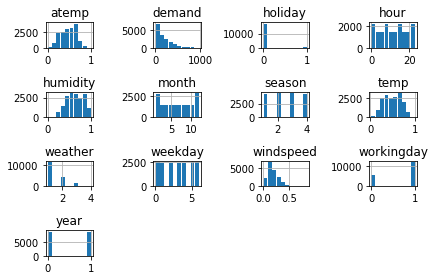

<Figure size 576x576 with 0 Axes>

In [6]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()
plt.figure(figsize=(8,8)) 

### Important point
* **Predicted variable demand is not normally distributed**

## Step3: Data Visualization

### Visualize the continuous features vs Demand

In [8]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


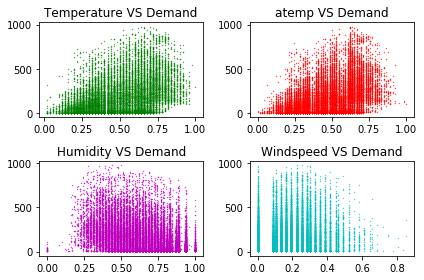

In [9]:
plt.subplot(2,2,1)
plt.title('Temperature VS Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=0.1,c='g')

plt.subplot(2,2,2)
plt.title('atemp VS Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=0.1,c='r')

plt.subplot(2,2,3)
plt.title('Humidity VS Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=0.1,c='m')

plt.subplot(2,2,4)
plt.title('Windspeed VS Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=0.1,c='c')
plt.tight_layout()

* Temperature increases demand goes up,same for atemp and temp and atemp has high possibilty of high correlation
   before concluding we should find correlation between the two
*  Windspeed inceases upto 0.4 shows no variation beyond it demand goes down significantly
* There is very little change in demand with the change in humidity

### Visualize the Categorical variables
* Season 1-spring , 2-season,3-fall, 4-winter
* Holiday 1-yes, 2-no
* weekday  0 to 6 sunday to saturday
* workingday 0-no, 1-yes
* weather 1-clear,few cloudy , 2-mist,cloudy , 3-light snow,light rain , 4-heavy rain,ice

### Plot the Categorical features vs demand

<Figure size 432x432 with 0 Axes>

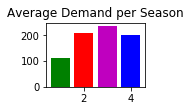

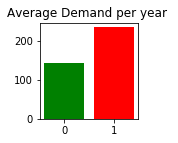

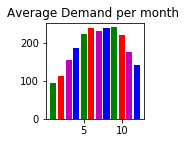

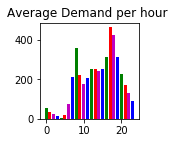

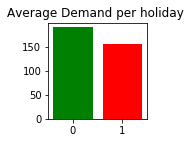

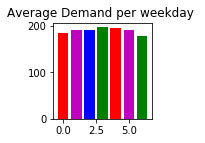

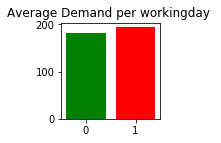

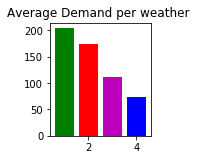

<Figure size 432x432 with 0 Axes>

In [10]:
# create a list of unique  seasons value
colours=['g','r','m','b']
#Create 3*3 subplot
#Season---------------------------------------------------------------
plt.subplot(3,3,1)
plt.title('Average Demand per Season')
list_cat=bikes_prep['season'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('season').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

# years----------------------------------------------------
plt.subplot(3,3,2)
plt.title('Average Demand per year ')
list_cat=bikes_prep['year'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('year').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

#month----------------------------------------------------------

plt.subplot(3,3,3)
plt.title('Average Demand per month ')
list_cat=bikes_prep['month'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('month').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))
#hour---------------------------------------------------

plt.subplot(3,3,4)
plt.title('Average Demand per hour ')
list_cat=bikes_prep['hour'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

#holiday--------------------------------

plt.subplot(3,3,5)
plt.title('Average Demand per holiday ')
list_cat=bikes_prep['holiday'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('holiday').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

#weekday--------------------------------

plt.subplot(3,3,6)
plt.title('Average Demand per weekday ')
list_cat=bikes_prep['weekday'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('weekday').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

#workingday-------------------------------------

plt.subplot(3,3,7)
plt.title('Average Demand per workingday ')
list_cat=bikes_prep['workingday'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('workingday').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

#weather-----------------------------------

plt.subplot(3,3,8)
plt.title('Average Demand per weather ')
list_cat=bikes_prep['weather'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('weather').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.tight_layout()
plt.figure(figsize=(6,6))



* **Features to be droped**
  * weekday as there is hardly any change in demand
  * year it is for only two year and we dont know of more  than two so we should drop it
  * workingday as no significant change

<Figure size 432x432 with 0 Axes>

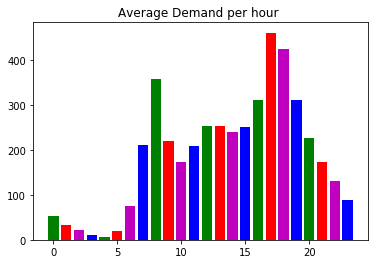

<Figure size 432x432 with 0 Axes>

In [12]:
plt.title('Average Demand per hour ')
list_cat=bikes_prep['hour'].unique()

#create average demand per season using groupby
list_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(list_cat,list_average, color=colours)
plt.figure(figsize=(6,6))

* At working hours demand increases at 8 am to 9 am and then 5 pm to 6 pm
* So it can be predicted that bikes should we available at 7 am near  public transpot premises and 3pm near business district 

### summerize Data visualization
* Demand is not normally distributed
* Temperature and demand have direct correlation
* The plot for temp and atemp appears to almost identical
* windspeed and  humidity affect demand but need more statistical analysis
* No significant change in demand due to weekday or workingday
* Year wise growth pattern is not considered due to limited number of years

### Cheack for outliers

In [15]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [16]:
bikes_prep['demand'].quantile([0.05,0.10,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

## Step 4: Check for Multipe Linear Regression Assumption

In [17]:
#Linearity using correlation coefficient matrix 
correlation=bikes[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


* atemp shows multicollinearity so,we will remove it.
* windspeed doesnt show linearity with demand so it will be removed.

## Step 5:Drop irrelevant features

In [18]:
bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

### Test for auto correlation in demand

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x243a4f3ff08>)

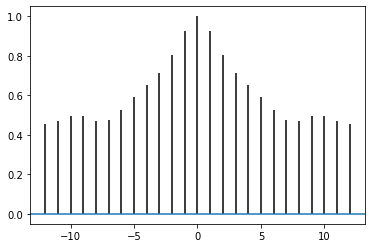

In [19]:
# Autocorrelation of demand using acor
dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)


* There is high autocorrelation for demand feature

## Step 6: Create /Modify more features

### log normalize the demand feature

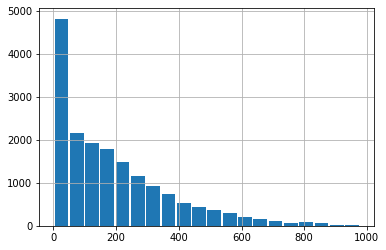

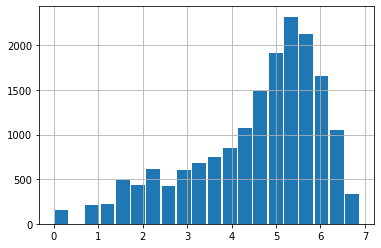

In [20]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])

### Solvng problem of autocorrelation

In [21]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()

In [22]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


## Step 7:Create dummy variables

In [23]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

### create dummy variables and drop first to avoid the dummy variable trap
* season,month,holiday,weather ,hour

In [24]:
bikes_prep_lag.dtypes

bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [26]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
bikes_prep_lag.shape

(17376, 47)

## Step 8: Create train and test split

In [28]:
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

## Step 9: Fit and score the model

In [29]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)

In [31]:
# Create Y Predictions
Y_predict = std_reg.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

## Step 10:Present the Result:

In [33]:
Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.35609417069802113
